## Import

In [58]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

##Selection

In [59]:
from sklearn.preprocessing import StandardScaler
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]


#Transformation

In [60]:
# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)

## Preprocessing

In [61]:
scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


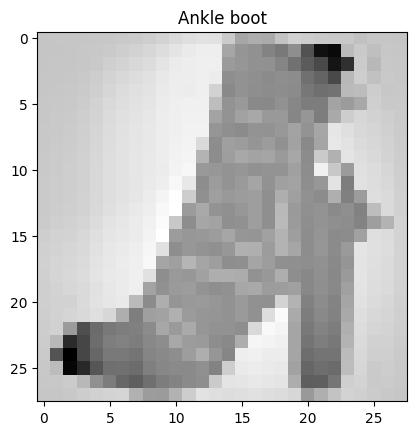

In [62]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Modélisation

In [63]:
# Flatten
model = tf.keras.models.Sequential()

# Add 3 layers,

#first layer contains 256 nodes and use relu activation function
model.add(tf.keras.layers.Dense(256, activation='relu'))

#second layer contains 128 nodes and use relu activation function
model.add(tf.keras.layers.Dense(128, activation='relu'))

#last layer contains 10 nodes and use softmax activation function
model.add(tf.keras.layers.Dense(10, activation='softmax'))




In [64]:
# Compile the model with the appropriate loss function and with sgd optimizer
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [65]:
#train your model. The number of itérations is 10.
history = model.fit(images, targets, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6034 - loss: 1.1976 - val_accuracy: 0.7715 - val_loss: 0.6100
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7952 - loss: 0.5571 - val_accuracy: 0.8110 - val_loss: 0.5207
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8411 - loss: 0.4561 - val_accuracy: 0.8250 - val_loss: 0.4793
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8568 - loss: 0.3979 - val_accuracy: 0.8320 - val_loss: 0.4587
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8745 - loss: 0.3564 - val_accuracy: 0.8380 - val_loss: 0.4439
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8784 - loss: 0.3355 - val_accuracy: 0.8435 - val_loss: 0.4307
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8965 - loss: 0.3170 - val_accuracy: 0.8500 - val_loss: 0.4269
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9005 - loss: 0.2889 - val_accuracy: 0.

## Evaluation and interpretation

In [66]:
#display the summary of your model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (32, 256)              │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,148 (918.55 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

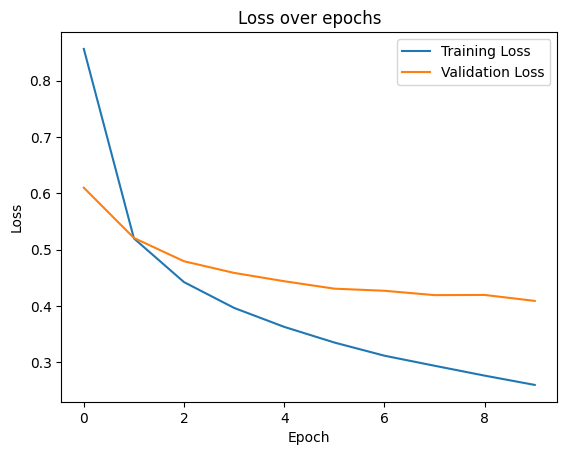

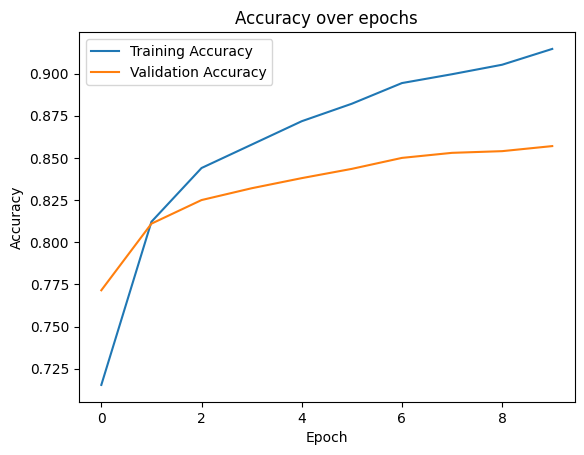

In [67]:
#display loss and accuracy curves



plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
